<a href="https://colab.research.google.com/github/EllsaMaharani/HandsOnOrbit/blob/main/Ellsa_Copy_of_Assesment_2_Model_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritma KNN

In [7]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [8]:
data_tips = sns.load_dataset('tips')
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Pre-processing

In [26]:
# Muat dataset 'tips' dari seaborn
df = sns.load_dataset('tips')

# Membuat kolom baru 'tip_size' sebagai target klasifikasi
# Klasifikasi: 1 untuk tip besar, 0 untuk tip kecil (berdasarkan median)
df['tip_size'] = df['tip'].apply(lambda x: 1 if x >= df['tip'].median() else 0)

# Ubah variabel kategori (seperti 'sex', 'smoker', 'day', dan 'time') menjadi numerik
# menggunakan map seperti contoh yang kamu berikan
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

# Periksa data untuk memastikan konversi berhasil
print(df.head())

   total_bill   tip sex smoker day time  size  tip_size
0       16.99  1.01   1      0   3    1     2         0
1       10.34  1.66   0      0   3    1     3         0
2       21.01  3.50   0      0   3    1     3         1
3       23.68  3.31   0      0   3    1     2         1
4       24.59  3.61   1      0   3    1     4         1


## Split Feature (X) dan Label (Y)

In [28]:
# Pilih atribut predictor/feature (semua kolom kecuali 'tip' dan 'tip_size')
X = df.drop(['tip', 'tip_size'], axis=1).values

# Pilih atribut target/label (yaitu 'tip_size')
y = df['tip_size'].values


## Normalisasi Data

In [15]:
# Lakukan scaling menggunakan StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

# X yang sudah dinormalisasi
print(X)

[[-0.31471131  1.34335316 -0.78478917  1.10506945  0.62158156 -0.60019263]
 [-1.06323531 -0.74440589 -0.78478917  1.10506945  0.62158156  0.45338292]
 [ 0.1377799  -0.74440589 -0.78478917  1.10506945  0.62158156  0.45338292]
 ...
 [ 0.3246295  -0.74440589  1.27422758  0.23806962  0.62158156 -0.60019263]
 [-0.2212865  -0.74440589 -0.78478917  0.23806962  0.62158156 -0.60019263]
 [-0.1132289   1.34335316 -0.78478917 -1.49593003  0.62158156 -0.60019263]]


## Splitting Data

In [16]:
# Split data menjadi training set dan test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Periksa ukuran set pelatihan dan pengujian
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (195, 6) (195,)
Test set: (49, 6) (49,)


## Modeling: Klasifikasi k-Nearest Neighbor (k-NN)

In [17]:
k = 7

# Membuat model KNN
model_knn = KNeighborsClassifier(n_neighbors = k)
# Fit model KNN pada data training
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting**

Kita sudah dapat menggunakan model yang telah di-training untuk **memprediksikan data**

In [20]:
# Prediksi pada set pengujian
y_pred = model_knn.predict(X_test)
print(y_pred)

[1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 0]


**Perhitungan Akurasi**

Pada klasifikasi, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan:

membandingkan kelas **hasil prediksi model** dengan **kelas sebenarnya/actual class**.

In [21]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.7692307692307693
Test set Accuracy:  0.7755102040816326


Accuracy train set dan test set tidak terpaut jauh. Accuracy keduanya juga sangat tinggi.

Bisa dikatakan model dengan k=7 sudah Good Fit.

**Klasifikasi Data Baru**

Model yang sudah good fit bisa kita gunakan untuk memprediksi data baru.

In [34]:
# Minta input dari pengguna untuk fitur yang relevan dari dataset tips
total_bill = float(input('Input Total Bill: '))
sex = int(input('Input Sex (0 untuk Male, 1 untuk Female): '))
smoker = int(input('Input Smoker (0 untuk No, 1 untuk Yes): '))
day = int(input('Input Day (0 untuk Thur, 1 untuk Fri, 2 untuk Sat, 3 untuk Sun): '))
time = int(input('Input Time (0 untuk Lunch, 1 untuk Dinner): '))
size = int(input('Input Size (Jumlah orang): '))

# Membuat data baru
new_data = [[total_bill, sex, smoker, day, time, size]]

# Prediksi data baru
hasil_prediksi = model_knn.predict(new_data)

# Cetak hasil prediksi
if hasil_prediksi == 0:
    print('\nCustomer diprediksi tidak memberi tip besar (bad vit).')
elif hasil_prediksi == 1:
    print('\nCustomer diprediksi memberi tip besar (good vit).')

Input Total Bill: 16.23
Input Sex (0 untuk Male, 1 untuk Female): 1
Input Smoker (0 untuk No, 1 untuk Yes): 0
Input Day (0 untuk Thur, 1 untuk Fri, 2 untuk Sat, 3 untuk Sun): 2
Input Time (0 untuk Lunch, 1 untuk Dinner): 0
Input Size (Jumlah orang): 4

Customer diprediksi memberi tip besar (good vit).


Performa dari model K-NN **sangat bergantung dengan nilai K**.

Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari **k=1** sampai dengan **k=10**.

In [31]:
Ks = 11
accuracies = []
precisions = []
recalls = []

# Loops dari k=1 sampai dengan k=10
for k in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors = k)

    # training model
    knn.fit(X_train, y_train)

    # membuat prediksi dari testing data
    y_hat = knn.predict(X_test)

    # menyimpan hasil pengujian
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    precisions.append(metrics.precision_score(y_test, y_hat))
    recalls.append(metrics.recall_score(y_test, y_hat))

    # cetak hasil pengujian
    print('k =', k)
    print('Accuracy =', metrics.accuracy_score(y_test, y_hat))
    print('Precision =', metrics.precision_score(y_test, y_hat))
    print('Recall =', metrics.recall_score(y_test, y_hat), '\n')

k = 1
Accuracy = 0.7346938775510204
Precision = 0.631578947368421
Recall = 0.6666666666666666 

k = 2
Accuracy = 0.6530612244897959
Precision = 0.5454545454545454
Recall = 0.3333333333333333 

k = 3
Accuracy = 0.7346938775510204
Precision = 0.6
Recall = 0.8333333333333334 

k = 4
Accuracy = 0.7346938775510204
Precision = 0.631578947368421
Recall = 0.6666666666666666 

k = 5
Accuracy = 0.7142857142857143
Precision = 0.5909090909090909
Recall = 0.7222222222222222 

k = 6
Accuracy = 0.7551020408163265
Precision = 0.6666666666666666
Recall = 0.6666666666666666 

k = 7
Accuracy = 0.7755102040816326
Precision = 0.6842105263157895
Recall = 0.7222222222222222 

k = 8
Accuracy = 0.7346938775510204
Precision = 0.6470588235294118
Recall = 0.6111111111111112 

k = 9
Accuracy = 0.7346938775510204
Precision = 0.631578947368421
Recall = 0.6666666666666666 

k = 10
Accuracy = 0.6938775510204082
Precision = 0.6153846153846154
Recall = 0.4444444444444444 



Analisis Hasil
Accuracy Terbaik:

Nilai tertinggi untuk Accuracy adalah 0.7755 pada
𝑘
=
7
k=7.
Precision Terbaik:

Nilai tertinggi untuk Precision adalah 0.6842 pada
𝑘
=
7
k=7.
Recall Terbaik:

Nilai tertinggi untuk Recall adalah 0.8333 pada
𝑘
=
3
k=3.

Kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan hasil pengujian

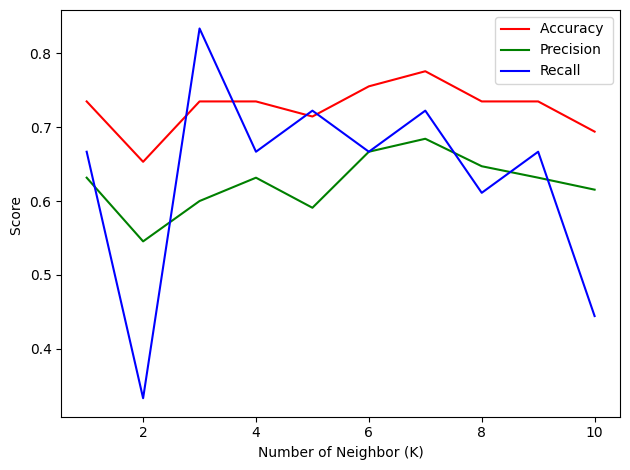

In [32]:
# Line Chart
plt.plot(range(1,Ks), accuracies, 'r')
plt.plot(range(1,Ks), precisions, 'g')
plt.plot(range(1, Ks), recalls, 'b')
plt.legend(('Accuracy ', 'Precision', 'Recall'))
plt.ylabel('Score ')
plt.xlabel('Number of Neighbor (K)')
plt.tight_layout()
plt.show()

In [33]:
max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi terbaik adalah ", max_accuracy, "dengan nilai k=", accuracies.index(max_accuracy)+1)
print("Precision terbaik adalah ", max_precision, "dengan nilai k=", precisions.index(max_precision)+1)
print("Recall terbaik adalah ", max_recall, "dengan nilai k=", recalls.index(max_recall)+1)

Akurasi terbaik adalah  0.7755102040816326 dengan nilai k= 7
Precision terbaik adalah  0.6842105263157895 dengan nilai k= 7
Recall terbaik adalah  0.8333333333333334 dengan nilai k= 3


Berdasarkan metric accuracy, model terbaik adalah model dengan nilai k=7.